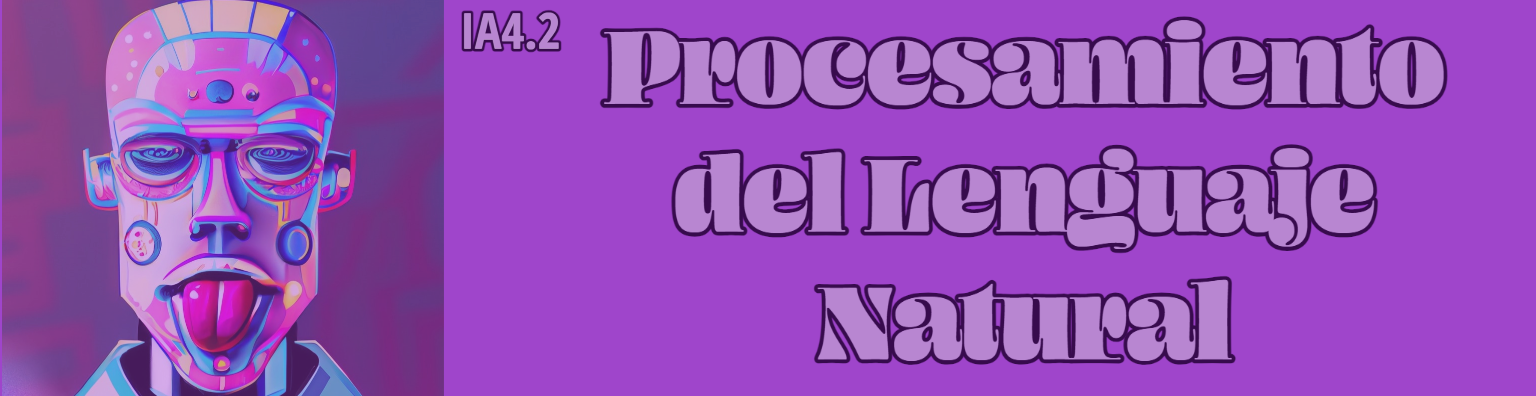

#TRABAJO PRÁCTICO 1

Alumnos:
Martin Perrone,
Pablo Pistarelli,
Max Eder



# Librerias



In [ ]:
!pip install nltk wordcloud
!pip install sentence-transformers
!pip install spacy
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=4c373184764652f391c50474c345f5ab7f462e166652be23ca73d20873b95f73
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
2023-11-05 19:27:43.960590: E tensorflow/compiler/xla/stream_executo

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable
import seaborn as sns
import random
import spacy
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import HTML

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




# Ejercicio 1: Web scraping



In [ ]:
# Establecemos la URL base del sitio.
base_url = 'https://noticiasargentinas.com/'

# Definimos las categorías y la cantidad de noticias que queremos extraer por categoría.
categorias = ['deportes', 'politica', 'espectaculos', 'economia']
num_noticias_por_categoria = 10

# Creamos una lista para acumular los datos.
data = []

# Agregamos un encabezado de agente de usuario (user-agent).
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

# Iteramos a través de las categorías para obtener noticias.
for categoria in categorias:
    url = categoria
    response = requests.get(base_url + url, headers=headers)  # Agregamos el encabezado de agente de usuario.

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Buscamos todos los elementos <h2> dentro de la página.
        h2_elements = soup.find_all('h2')

        # Creamos una lista para almacenar los enlaces de las noticias.
        enlaces_noticias = []

        # Extraemos los enlaces de las noticias desde los elementos <h2>.
        for h2 in h2_elements:
            enlace = h2.find('a')
            if enlace:
                enlaces_noticias.append(enlace['href'])

        # Recorremos los enlaces de las noticias y limitamos a 10 noticias por categoría.
        for enlace_noticia in enlaces_noticias[:num_noticias_por_categoria]:
            noticia_url = base_url + enlace_noticia

            # Realizamos una solicitud HTTP para acceder a la página de la noticia.
            time.sleep(2)  # Agregamos una pausa de 2 segundos antes de cada solicitud.
            noticia_response = requests.get(noticia_url, headers=headers)  # Agregamos el encabezado de agente de usuario.

            if noticia_response.status_code == 200:
                noticia_soup = BeautifulSoup(noticia_response.text, 'html.parser')

                # Extraemos el contenido de la noticia.
                contenido = noticia_soup.find('div', class_='itemFullText')

                if contenido:
                    texto = contenido.text
                    titulo = noticia_soup.find('h1').text
                    data.append({'categoria': categoria, 'URL': noticia_url, 'titulo': titulo, 'texto': texto})
                else:
                    print("Contenido no encontrado para la noticia:", noticia_url)
            else:
                print(f"Error {noticia_response.status_code} al acceder a {noticia_url}")
    else:
        print(f"Error {response.status_code} al acceder a {base_url + url}")

# Creamos un DataFrame a partir de los datos acumulados.
df = pd.DataFrame(data)

# Guardamos los datos en un archivo CSV.
df.to_csv('noticias.csv', index=False)

In [ ]:
df = pd.read_csv('noticias.csv')
df

,categoria,URL,titulo,texto
0,deportes,https://noticiasargentinas.com//deportes/liber...,"""Libertad para papá"", el emotivo gol agónico ...",El futbolista colombiano Luis Díaz protagonizó...
1,deportes,https://noticiasargentinas.com//deportes/monte...,"Montenegro y Santero, los ganadores del TC200...","Ignacio Montenegro, piloto de Renault, y Juliá..."
2,deportes,https://noticiasargentinas.com//deportes/boca-...,Boca regresa a la Argentina sin tiempo para l...,El plantel de Boca regresa este domingo a Buen...
3,deportes,https://noticiasargentinas.com//deportes/el-me...,El mensaje de Cavani tras la derrota de Boca ...,El delantero de Boca Edinson Cavani agradeció ...
4,deportes,https://noticiasargentinas.com//deportes/djoko...,Djokovic le ganó a Dimitrov en la final del M...,El tenista serbio Novak Djokovic superó por 6-...
5,deportes,https://noticiasargentinas.com//deportes/como-...,Cómo ver en vivo Newell's vs Sarmiento: fútbo...,Newell's Old Boys de Rosario y Sarmiento de Ju...
6,deportes,https://noticiasargentinas.com//deportes/como-...,Cómo ver en vivo Estudiantes vs Defensa y Jus...,Estudiantes de La Plata y Defensa y Justicia j...
7,deportes,https://noticiasargentinas.com//deportes/como-...,Cómo ver en vivo Unión vs Lanús: fútbol libre...,"Unión de Santa Fe y Lanús jugarán esta tarde,..."
8,deportes,https://noticiasargentinas.com//deportes/como-...,Cómo ver en vivo Racing vs Central Córdoba: f...,Racing Club y Central Córdoba de Santiago del ...
9,deportes,https://noticiasargentinas.com//deportes/escan...,"Escándalo en un Vélez al borde del descenso, ...","La situación de Vélez es desesperante, para un..."


Nuestro principal desafío en la implementación de este código fué la identificación de la ubicación exacta de los elementos requeridos en el HTML de la página para construir nuestro conjunto de datos. En particular, fue necesario determinar en qué celdas o secciones del código HTML se encontraban los elementos como los títulos de noticias, enlaces, categorías y texto de las noticias. Esto implicó un proceso de inspección del HTML y la utilización de técnicas de web scraping para extraer la información deseada de la estructura  de la página web. Luego fue necesario filtrar enlaces a otras noticias dentro del cuerpo de las noticias



# Ejercicio 2: Modelo de clasificación de noticias



In [ ]:
# Cargamos el DataFrame con los datos
df = pd.read_csv('noticias.csv')

# Dividimos los datos en conjuntos de entrenamiento y prueba
X = df['titulo']
y = df['categoria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización de características con TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrena el modelo SVM
clf = SVC(C=1.0, kernel='linear', random_state=42)
clf.fit(X_train_tfidf, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_tfidf)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00         1
    economia       0.25      1.00      0.40         1
espectaculos       0.67      1.00      0.80         2
    politica       1.00      0.25      0.40         4

    accuracy                           0.50         8
   macro avg       0.48      0.56      0.40         8
weighted avg       0.70      0.50      0.45         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Buscamos 5 títulos de otra página para predecir las categorías con el modelo de clasificación

# URL base del sitio
base_url = 'https://elpais.com/noticias/argentina/'

# Agregamos un encabezado de agente de usuario (user-agent)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}


titulos_noticias = []

response = requests.get(base_url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscamos todos los elementos <h2> dentro de la página
    h2_elements = soup.find_all('h2')

    # Extraemos los títulos de las noticias desde los elementos <h2>
    for h2 in h2_elements:
        enlace = h2.find('a')
        if enlace:
            titulo_noticia = enlace.text
            titulos_noticias.append(titulo_noticia)

# Tomamos hasta 5 títulos en orden aleatorio
títulos_aleatorios = random.sample(titulos_noticias, min(5, len(titulos_noticias)))

In [ ]:
secciones_predichas = []

# Recorremos la lista de títulos y hace predicciones para cada título
for titulo in títulos_aleatorios:
    titulo_tfidf = tfidf_vectorizer.transform([titulo])
    prediccion = clf.predict(titulo_tfidf)
    seccion_predicha = prediccion[0]
    secciones_predichas.append(seccion_predicha)

# Imprimimos las secciones predichas para cada título
for i, seccion in enumerate(secciones_predichas):
    print(f"Título {i + 1}: {títulos_aleatorios[i]}")
    print(f"Sección Predicha: {seccion}")
    print()

Título 1: ‘Podcast’ | Sin control. El universo de Javier Milei
Sección Predicha: politica

Título 2: Milei ablanda su imagen para atraer a votantes moderados
Sección Predicha: politica

Título 3: Votar en contra
Sección Predicha: politica

Título 4: Las cataratas de Iguazú se desbordan ante el incremento desmedido de su caudal
Sección Predicha: espectaculos

Título 5: El Fluminense alza su primera Copa Libertadores al ganar a Boca Juniors en una dramática final
Sección Predicha: deportes



 El modelo muestra una ineficiencia notable en la clasificación de noticias debido a la falta de datos de entrenamiento. Aunque se han proporcionado métricas de rendimiento, estas varían según los datos y no reflejan completamente la limitación principal: que sólo fue entrenado con 10 de titulos de noticias de cada categoría. Es importante destacar que el modelo tiene cierta capacidad para predecir con precisión noticias de otros portales que contienen palabras idénticas a las del conjunto de entrenamiento.



# Ejercicio 3: Normalización y limpieza - Conteo de palabras y nube



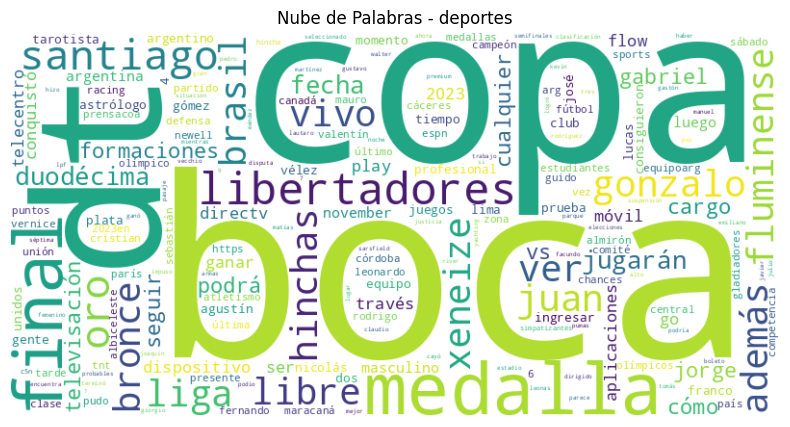

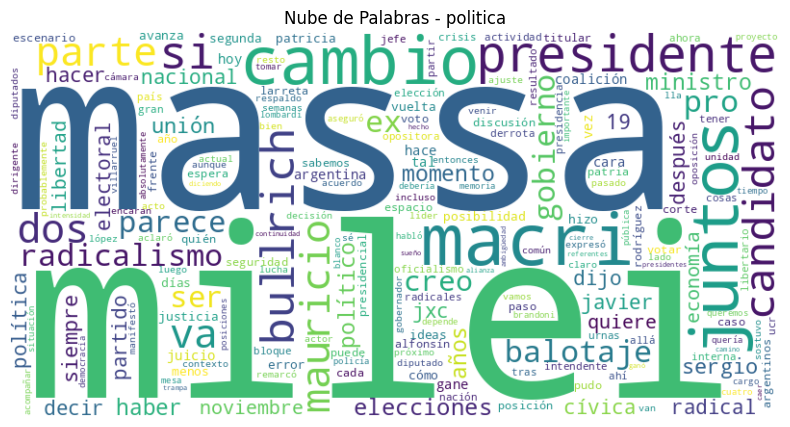

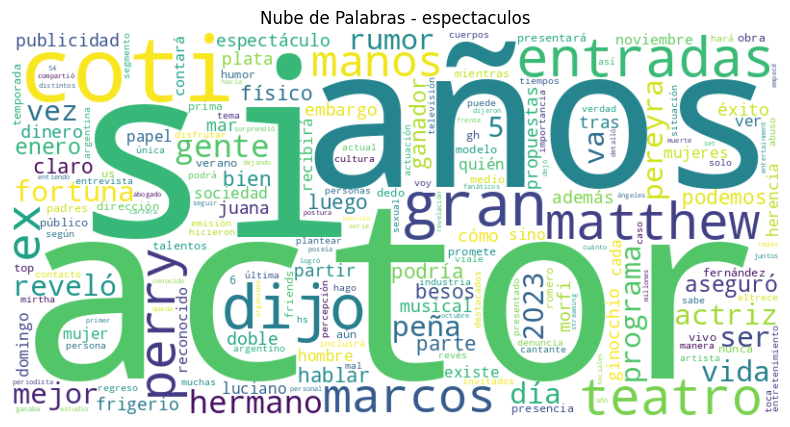

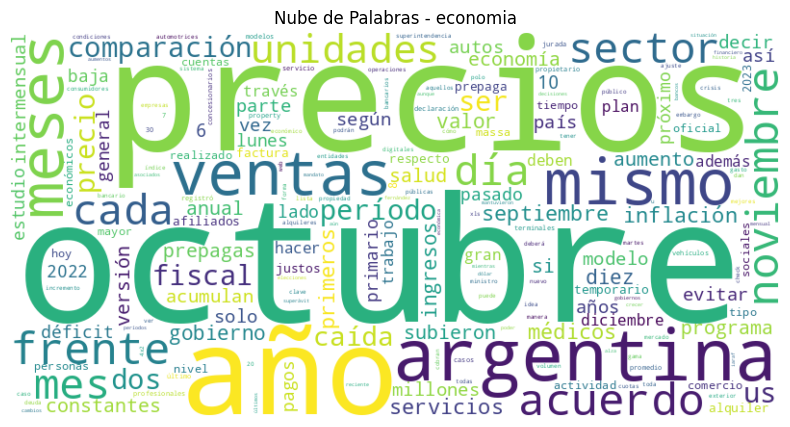

In [ ]:

# Función para procesar y limpiar el texto
def procesar_texto(texto):
    # Convierte el texto a minúsculas
    texto = texto.lower()

    # Tokeniza el texto en palabras
    palabras = nltk.word_tokenize(texto)

    # Filtra las palabras vacías (stop words) en el idioma español
    stop_words = set(stopwords.words('spanish'))
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

    # Elimina signos de puntuación y caracteres especiales
    palabras_filtradas = [palabra for palabra in palabras_filtradas if palabra.isalnum()]

    return palabras_filtradas

# Procesamiento y conteo de palabras para cada categoría
for categoria in categorias:
    # Filtra las filas del DataFrame por la categoría actual
    noticias_categoria = df[df['categoria'] == categoria]

    # Concatena el texto de todas las noticias de la categoría
    texto_categoria = ' '.join(noticias_categoria['texto'])

    # Procesa y limpia el texto
    palabras_limpias = procesar_texto(texto_categoria)

    # Realiza el conteo de palabras
    conteo_palabras = nltk.FreqDist(palabras_limpias)

    # Muestra la importancia de las palabras mediante una nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteo_palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de Palabras - {categoria}')
    plt.axis('off')
    plt.show()

In [ ]:
def barplots(categorias, palabras_frecuentes):
    num_categorias = len(categorias)
    num_rows = num_categorias // 2 + (num_categorias % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Recorre cada categoría para generar su gráfico de barras
    for i, categoria in enumerate(categorias):
        row = i // 2
        col = i % 2
        df_categoria = palabras_frecuentes[palabras_frecuentes['categoria'] == categoria]
        df_categoria = df_categoria.iloc[:10]  # Tomar las 10 palabras más frecuentes
        axes[row, col].bar(df_categoria['palabra'], df_categoria['frecuencia'])
        axes[row, col].set_title(f'Palabras más frecuentes - {categoria}')
        axes[row, col].set_xlabel('Palabra')
        axes[row, col].set_ylabel('Frecuencia')
        axes[row, col].tick_params(axis='x', labelrotation=45)

    # Eliminar subplots vacíos si es necesario
    if num_categorias % 2 != 0:
        for i in range(num_categorias % 2, 2):
            fig.delaxes(axes[num_rows - 1, i])

    plt.show()

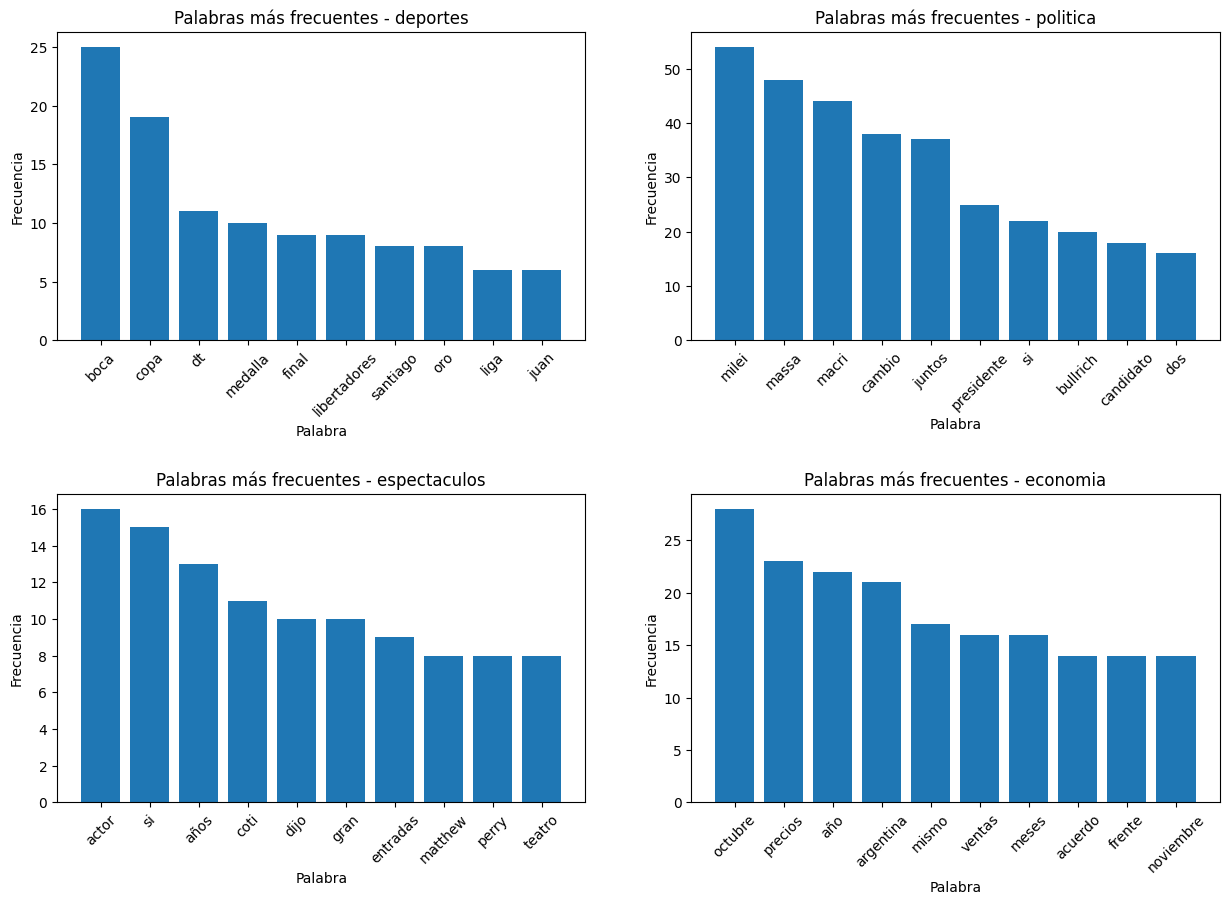

In [ ]:
# Crea un DataFrame con las palabras más frecuentes para cada categoría
data = []

for categoria in categorias:
    noticias_categoria = df[df['categoria'] == categoria]
    texto_categoria = ' '.join(noticias_categoria['texto'])
    palabras_limpias = procesar_texto(texto_categoria)
    conteo_palabras = nltk.FreqDist(palabras_limpias)

    # Agrega los datos a la lista
    for palabra, frecuencia in conteo_palabras.most_common(10):
        data.append({'categoria': categoria, 'palabra': palabra, 'frecuencia': frecuencia})

# Crea el DataFrame a partir de la lista de datos
df_palabras_frecuentes = pd.DataFrame(data)

barplots(categorias, df_palabras_frecuentes)


En el proceso de limpieza de texto, llevamos a cabo una serie de transformaciones esenciales para preparar los datos textuales antes de su análisis. Estas transformaciones incluyeron la conversión de todo el texto a minúsculas, lo que garantizó que las palabras se trataran de manera uniforme. Luego, procedimos a la tokenización, dividiendo el texto en palabras individuales para su posterior análisis y conteo. Además, aplicamos un filtro para eliminar las 'stop words', que generalmente no aportan información relevante. Por último, eliminamos los signos de puntuación y caracteres especiales. Estas acciones de limpieza permitieron simplificar el texto y reducir el ruido, lo que, en última instancia, facilitó la identificación de nombres propios como las palabras más frecuentes, tal como se observa tanto en las nubes de palabras como en los gráficos de barras.



# Ejercicio 4: Embedding



In [ ]:
# Cremos listas con los títulos de cada categoría

titulos_deportes = df[df['categoria'] == 'deportes']['titulo'].tolist()
titulos_politica = df[df['categoria'] == 'politica']['titulo'].tolist()
titulos_espectaculos = df[df['categoria'] == 'espectaculos']['titulo'].tolist()
titulos_economia = df[df['categoria'] == 'economia']['titulo'].tolist()

In [ ]:
# Aplicamos la función para procesar y limpiar el texto a cada lista

titulos_deportes_limpios = []
for i in titulos_deportes:
  titulos_deportes_limpios.append(procesar_texto(i))


titulos_politica_limpios = []
for i in titulos_politica:
  titulos_politica_limpios.append(procesar_texto(i))


titulos_espectaculos_limpios = []
for i in titulos_espectaculos:
  titulos_espectaculos_limpios.append(procesar_texto(i))


titulos_economia_limpios = []
for i in titulos_economia:
  titulos_economia_limpios.append(procesar_texto(i))

In [ ]:
# Cargamos el modelo preentrenado multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')


# Función para calcular similitud entre títulos de una categoría
def calcular_similitud(titulos):
    # Codificamos los títulos
    embeddings = modelo.encode(titulos, convert_to_tensor=True)

    # Calculamos las puntuaciones de similitud
    puntuaciones_coseno = util.cos_sim(embeddings, embeddings)

    # Encontramos las puntuaciones de similitud más altas
    pares = []
    for i in range(len(puntuaciones_coseno)-1):
        for j in range(i+1, len(puntuaciones_coseno)):
            pares.append({'index': [i, j], 'score': puntuaciones_coseno[i][j]})

    # Ordenamos las puntuaciones en orden decreciente
    pares = sorted(pares, key=lambda x: x['score'], reverse=True)

    return pares

# Calculamos similitud para cada categoría
similitud_deportes = calcular_similitud(titulos_deportes_limpios)
similitud_politica = calcular_similitud(titulos_politica_limpios)
similitud_espectaculos = calcular_similitud(titulos_espectaculos_limpios)
similitud_economia = calcular_similitud(titulos_economia_limpios)

# Función para mostrar resultados en una tabla
def mostrar_resultados(similitud, categoria, titulos):
    tabla = PrettyTable()
    tabla.field_names = ["Título 1", "Título 2", "Puntuación de Similitud"]
    for par in similitud[0:10]:
        i, j = par['index']
        tabla.add_row([titulos[i], titulos[j], f"{par['score']:.4f}"])
    print(f"Resultados para la categoría '{categoria}':")
    print(tabla)

# Mostramos resultados por categoría
mostrar_resultados(similitud_deportes, "Deportes", titulos_deportes)
mostrar_resultados(similitud_politica, "Política", titulos_politica)
mostrar_resultados(similitud_espectaculos, "Espectáculos", titulos_espectaculos)
mostrar_resultados(similitud_economia, "Economía", titulos_economia)

Resultados para la categoría 'Deportes':
+----------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------+-------------------------+
|                                              Título 1                                              |                                                  Título 2                                                 | Puntuación de Similitud |
+----------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------+-------------------------+
|      Racing empata con Defensa y Justicia en el cierre de la undécima fecha: seguilo en vivo       |  Un DT campeón del mundo con Brasil subestimó a Boca en la previa de la Libertadores: "Vamos a festejar"  |          0.6365         |
|       Cer

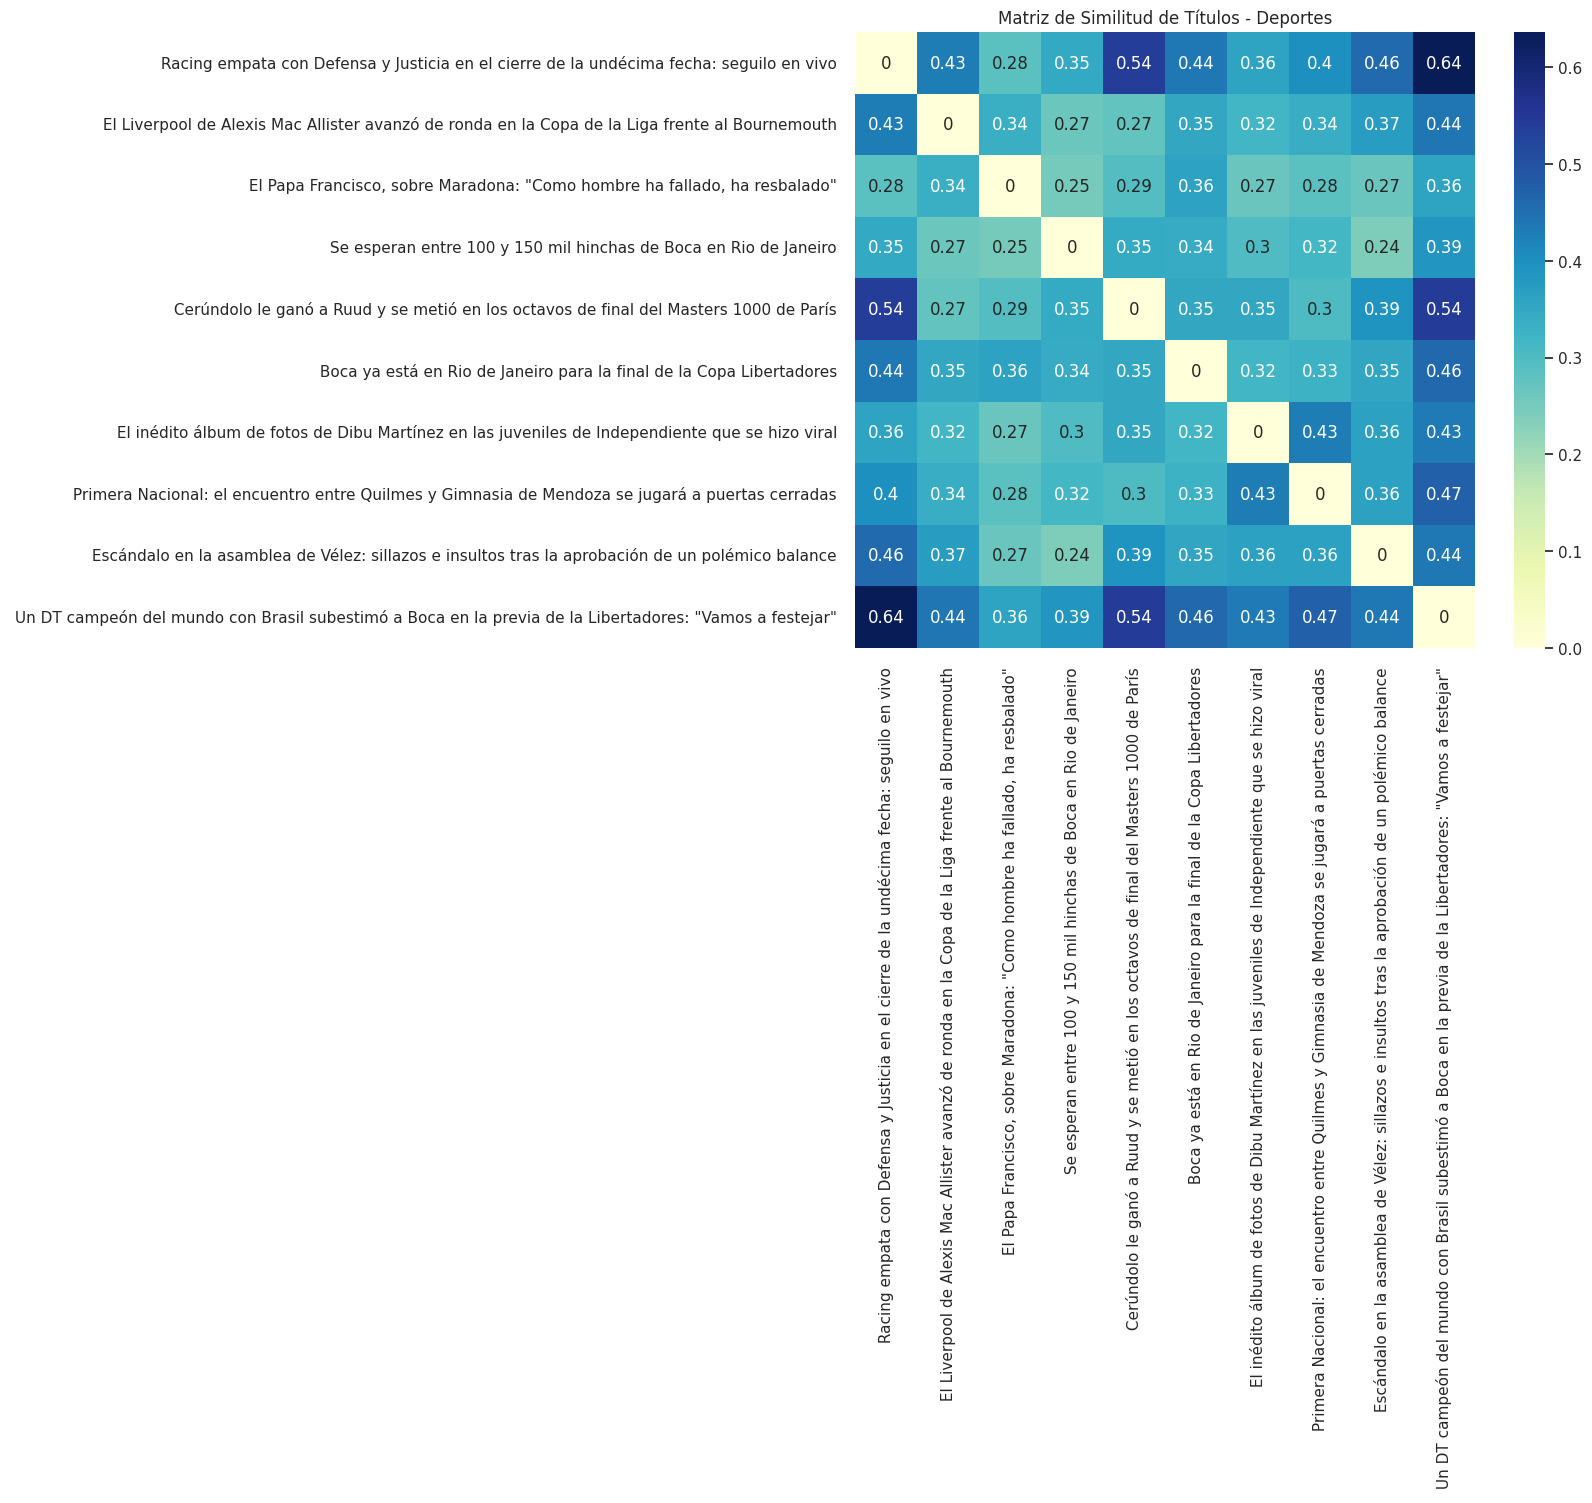

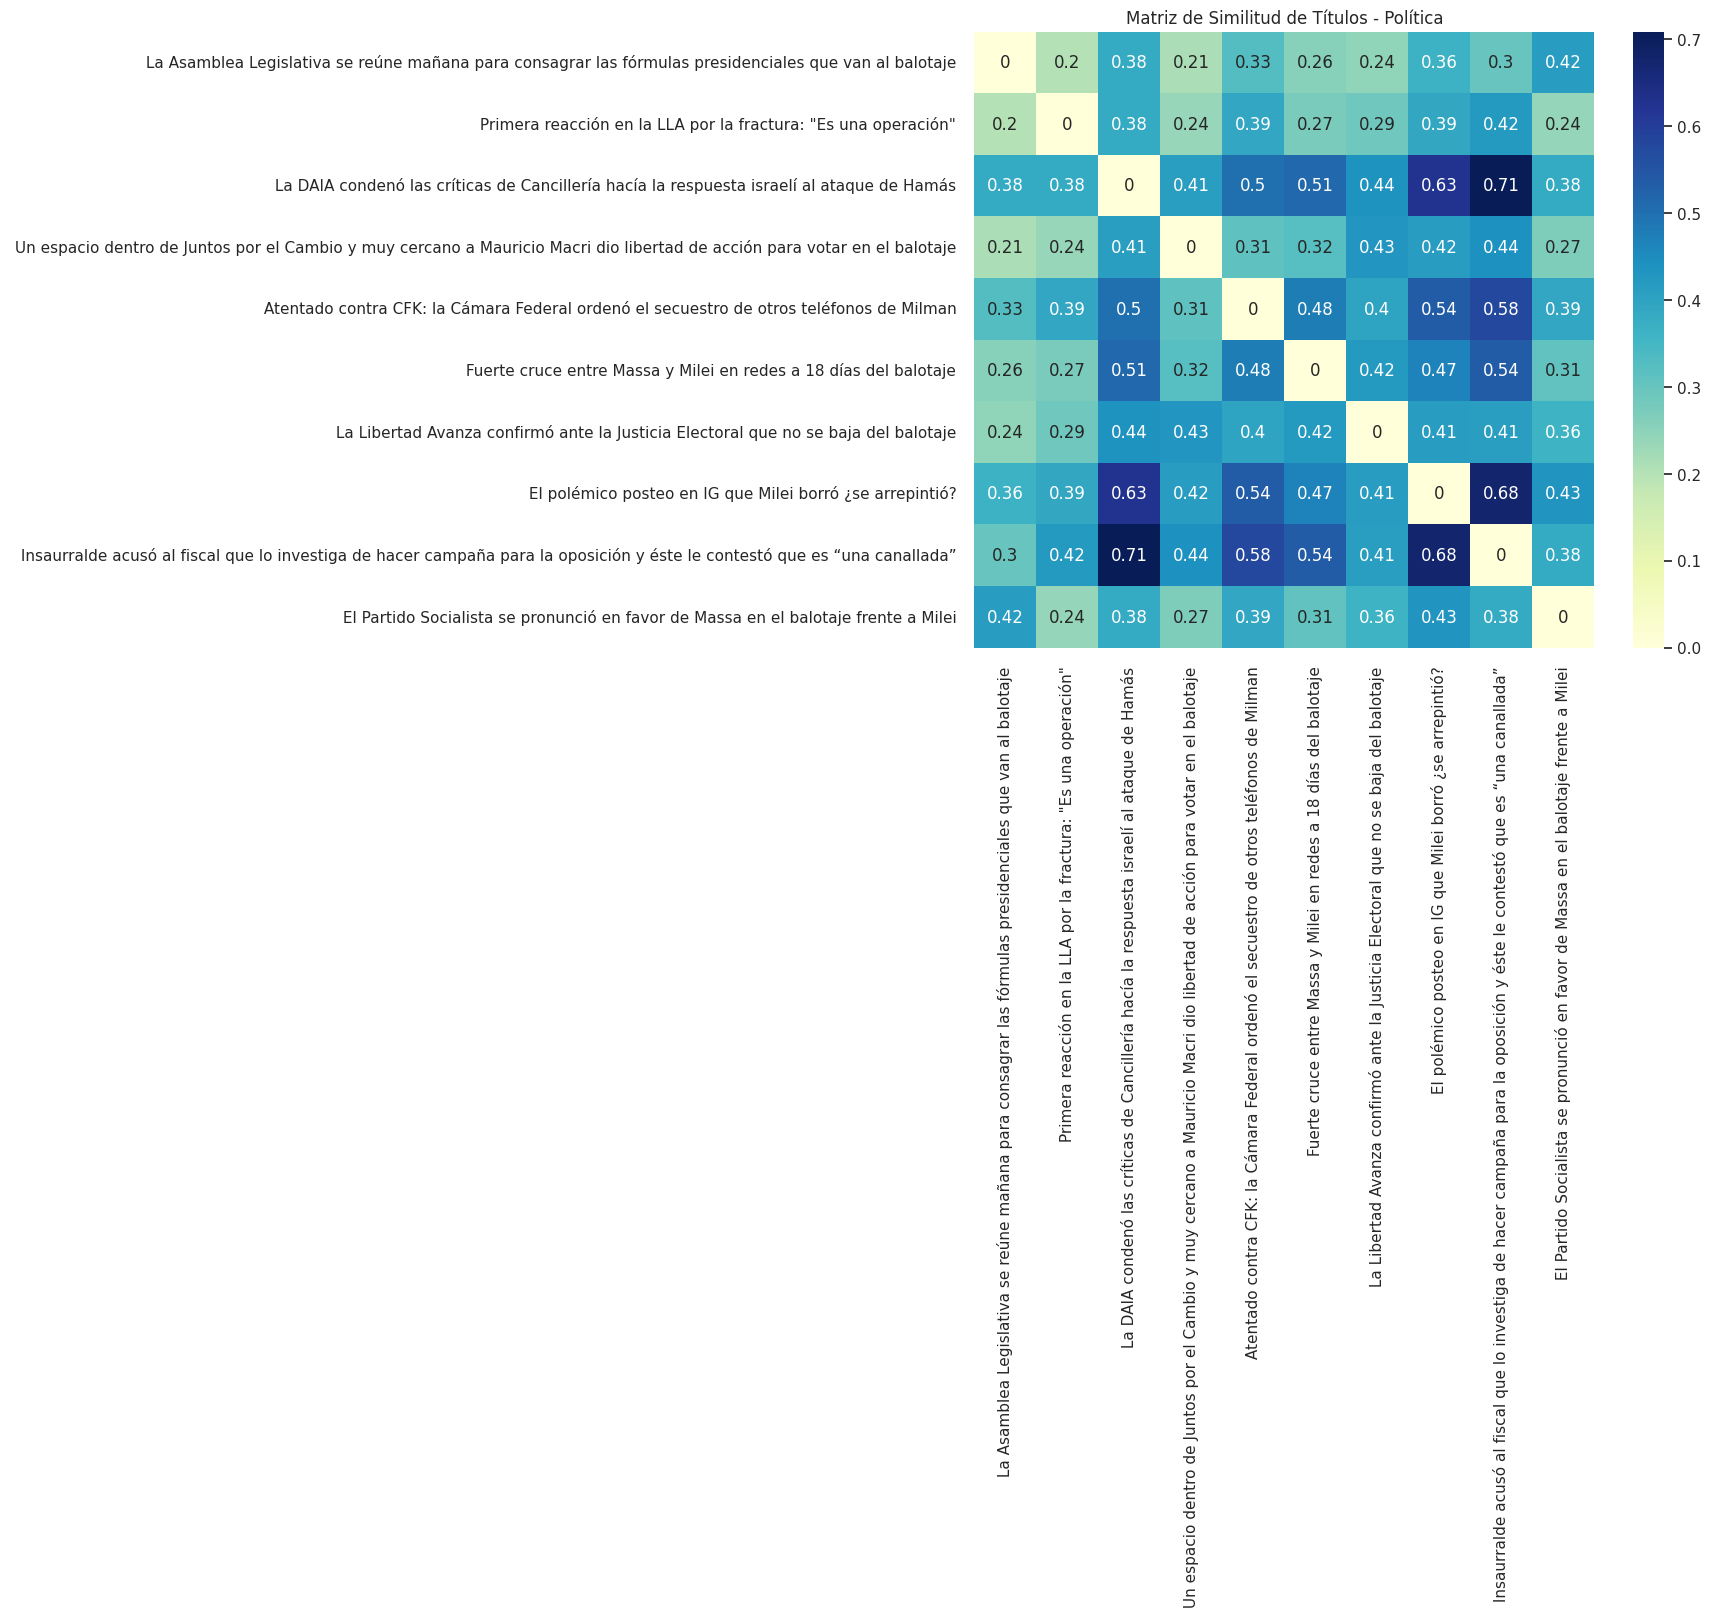

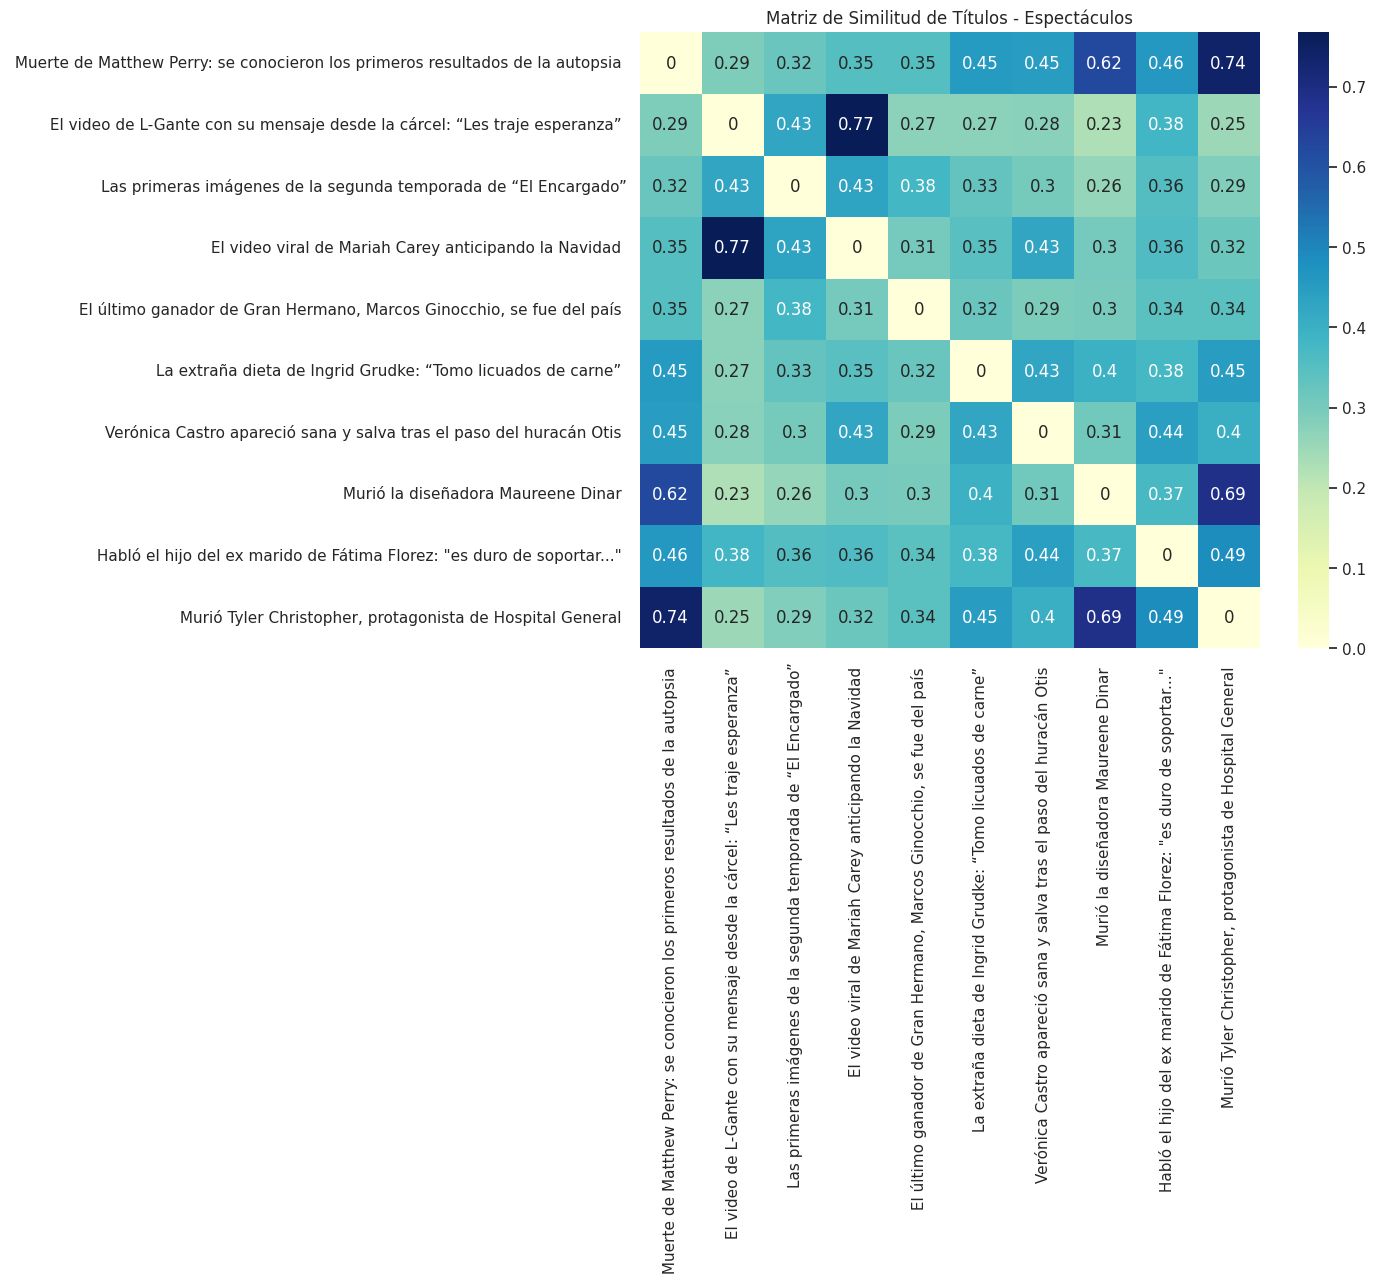

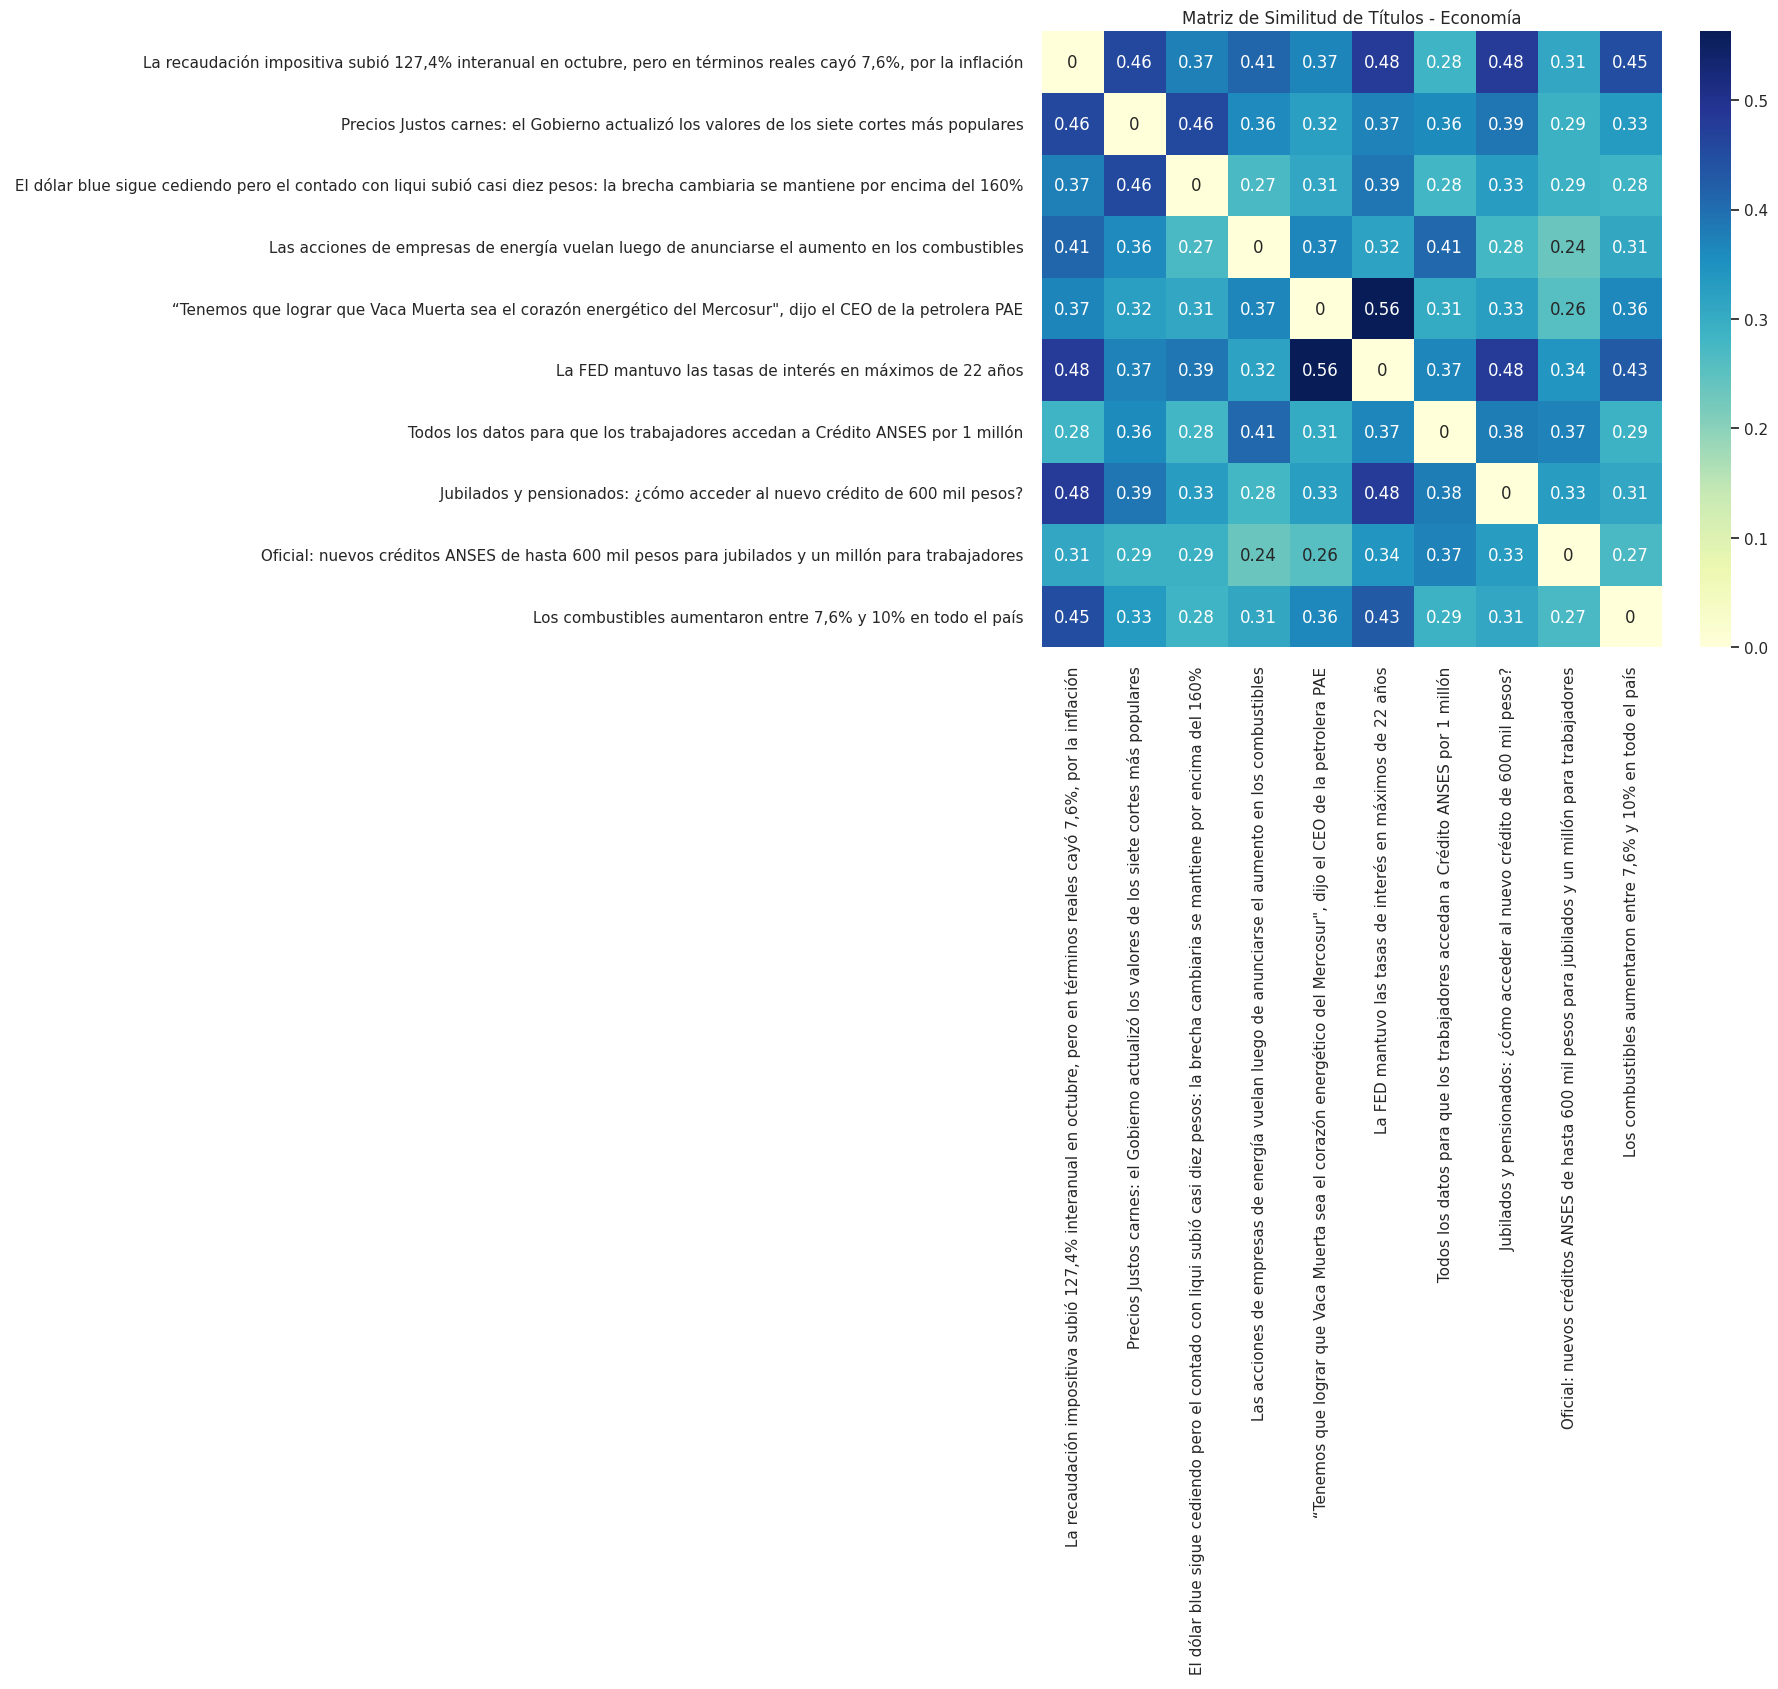

In [ ]:
# Función para mostrar una matriz de calor
def mostrar_matriz_de_calor(similitud, categoria, titulos):
    # Creamos una matriz de similitud
    num_titulos = len(titulos)
    matriz_similitud = np.zeros((num_titulos, num_titulos))
    for par in similitud:
        i, j = par['index']
        matriz_similitud[i][j] = par['score']
        matriz_similitud[j][i] = par['score']  # La similitud es simétrica

    # Configuramos el gráfico de la matriz de calor
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)
    sns.heatmap(matriz_similitud, annot=True, cmap="YlGnBu", xticklabels=titulos, yticklabels=titulos)
    plt.title(f"Matriz de Similitud de Títulos - {categoria}")
    plt.xticks(rotation=90)
    plt.show()

# Aplicamos la función de matriz de calor a cada categoría
mostrar_matriz_de_calor(similitud_deportes, "Deportes", titulos_deportes)
mostrar_matriz_de_calor(similitud_politica, "Política", titulos_politica)
mostrar_matriz_de_calor(similitud_espectaculos, "Espectáculos", titulos_espectaculos)
mostrar_matriz_de_calor(similitud_economia, "Economía", titulos_economia)

En contraposición a lo que podríamos esperar, nuestro modelo  muestra limitaciones notables. A pesar de su utilidad para identificar títulos relacionados, no logra comprender por completo el contexto y la intención detrás de los títulos. Es sensible al contenido, lo que significa que tiende a considerar similares aquellos títulos con palabras clave compartidas, pero no puede diferenciar entre títulos que comparten temas superficiales pero abordan eventos o enfoques diferentes. Su rendimiento está fuertemente influenciado por la calidad de los datos de entrenamiento y la sensibilidad al contenido.



# Ejercicio 5: Resumen de las noticias



In [ ]:

def generate_random_summary(section):

       # Filtramos las noticias de la sección seleccionada
      section_news = df[df['categoria'] == section]

      random_row = section_news.sample(n=1)
      random_text = random_row['texto'].values[0]

      # Función para generar un resumen extractivo usando PageRank
      def summarize(similarity_matrix, num_sentences=5):
          # Crear un grafo a partir de la matriz de similitud
          nx_graph = nx.from_numpy_array(similarity_matrix)
          # Aplicar PageRank al grafo
          scores = nx.pagerank(nx_graph, max_iter=100)
          # Ordenar las oraciones por su puntuación y seleccionar las mejores
          ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(original_sentences)), reverse=True)
          return ' '.join([ranked_sentences[i][1] for i in range(num_sentences)])

      # Cargar el modelo de spaCy
      nlp = spacy.load('es_core_news_md')

      doc = nlp(random_text)

      # Lematizar y eliminar stopwords de cada oración
      lemmatized_sentences = []
      original_sentences = []
      for sent in doc.sents:
          lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
          if lemmatized_sentence.strip() != '':  # Asegurarse de que la oración no esté vacía
              lemmatized_sentences.append(lemmatized_sentence)
              original_sentences.append(str(sent).strip())

      # Procesar las oraciones lematizadas con spaCy para obtener sus vectores
      lemmatized_docs = [nlp(sent) for sent in lemmatized_sentences]

      # Obtenemos una lista con los vectores de cada oración
      sentence_vectors = [sent.vector for sent in lemmatized_docs]

      # Crear una matriz de similitud entre las oraciones filtradas
      similarity_matrix = cosine_similarity(sentence_vectors)

      # Generar resumen extractivo
      resumen = summarize(similarity_matrix, num_sentences=2)
      return resumen

In [ ]:
while True:
    print("Selecciones una sección:")
    print("1. Deportes")
    print("2. Política")
    print("3. Espectáculos")
    print("4. Economía")
    print("0. Salir")

    choice = input("Ingrese el número de la sección o 0 para salir: ")

    if choice == '0':
        break
    elif choice in ['1', '2', '3', '4']:
        section_index = int(choice) - 1
        section = categorias[section_index]

        random_summary = generate_random_summary(section)

        print("\n" * 10)
        display(HTML(f"<h1>Resumen Extractivo para la Sección '{section}'</h1>"))
        display(HTML(random_summary))
        print("\n" * 10)
        input("Presione Enter para continuar...")
    else:
        print("Selección no válida. Por favor, ingrese un número válido o 0 para salir.")
        input("Presione Enter para continuar...")

Selecciones una sección:
1. Deportes
2. Política
3. Espectáculos
4. Economía
0. Salir
Ingrese el número de la sección o 0 para salir: 1
























Presione Enter para continuar...2
Selecciones una sección:
1. Deportes
2. Política
3. Espectáculos
4. Economía
0. Salir
Ingrese el número de la sección o 0 para salir: 2
























Presione Enter para continuar...
Selecciones una sección:
1. Deportes
2. Política
3. Espectáculos
4. Economía
0. Salir
Ingrese el número de la sección o 0 para salir: 3
























Presione Enter para continuar...4
Selecciones una sección:
1. Deportes
2. Política
3. Espectáculos
4. Economía
0. Salir
Ingrese el número de la sección o 0 para salir: 4
























Presione Enter para continuar...
Selecciones una sección:
1. Deportes
2. Política
3. Espectáculos
4. Economía
0. Salir
Ingrese el número de la sección o 0 para salir: 0


Elegimos utilizar un modelo de resumen extractivo en lugar de uno abstractivo debido a que estamos trabajando con noticias. En el resumen extractivo, el modelo selecciona y extrae fragmentos directos del texto original, lo que garantiza que el resumen esté compuesto por oraciones que ya están presentes en las noticias. Esto es esencial para mantener la precisión y evitar la generación de información errónea o abstracta que podría ocurrir en un resumen abstractivo. En resumen, priorizamos la fidelidad al contenido original y la integridad de la información.